In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
# Step 1: Read the CSV file and extract relevant columns
data = pd.read_csv("train.csv")
time_series_data = data['Sales'].values.reshape(-1, 1)

In [15]:
# Step 2: Check for stationarity
def check_stationarity(data):
    result = adfuller(data)
    p_value = result[1]
    if p_value <= 0.05:
        return True
    else:
        return False

is_stationary = check_stationarity(time_series_data)

# Step 3: Difference the time series data if non-stationary
if not is_stationary:
    differenced_data = np.diff(time_series_data, axis=0)
else:
    differenced_data = time_series_data

Check for autocorrelation and partial autocorrelation of your data:
Autocorrelation (ACF) and partial autocorrelation (PACF) plots help us identify the appropriate lag values for our LSTM model. 

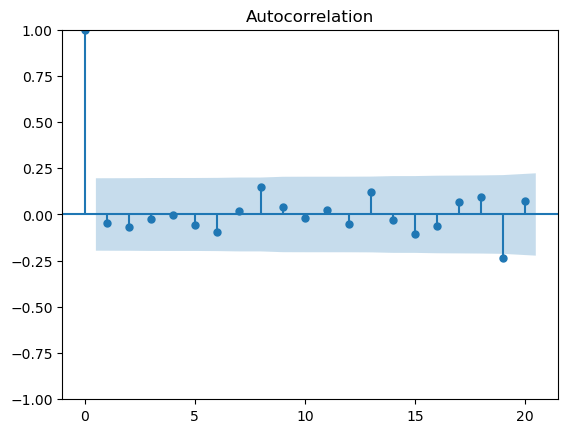

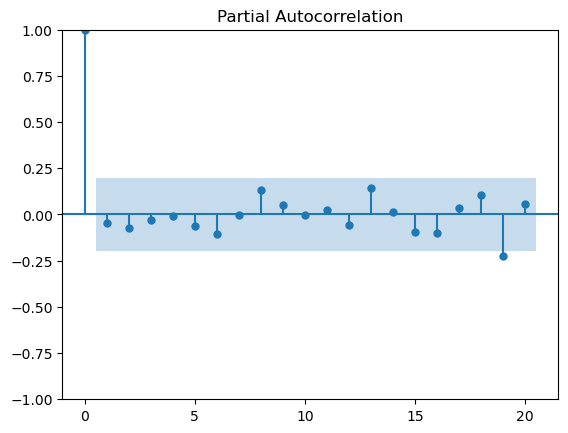

In [6]:
# Step 4: Check autocorrelation and partial autocorrelation
plot_acf(differenced_data)
plt.title('Autocorrelation')
plt.show()

plot_pacf(differenced_data)
plt.title('Partial Autocorrelation')
plt.show()

In [16]:
# Step 5: Transform time series data into supervised learning data
def create_supervised_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 10  # Number of previous time steps to consider
X, y = create_supervised_data(differenced_data, n_steps)

In [17]:
# Step 6: Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

Epoch 1/50


c:\Users\huawei\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.1853 - val_loss: 0.2315
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1889 - val_loss: 0.2233
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1741 - val_loss: 0.2169
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1777 - val_loss: 0.2134
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1790 - val_loss: 0.2118
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1719 - val_loss: 0.2101
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1618 - val_loss: 0.2091
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1837 - val_loss: 0.2090
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1811 - val_loss: 0.2090
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1886 - val_loss: 0.2097
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1678 - val_loss: 0.2104
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1792 - val_loss: 0.2108
Epoch 13/50

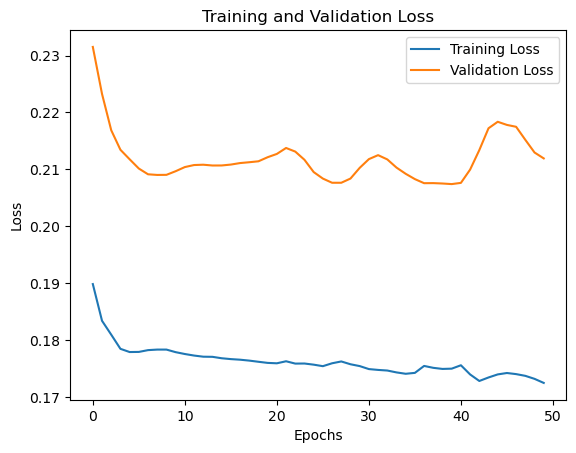

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


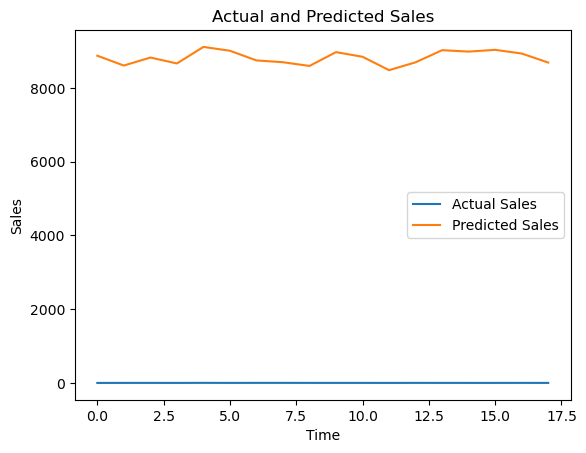

In [18]:
# Step 7: Build the LSTM regression model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Plot the actual and predicted sales
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual and Predicted Sales')
plt.legend()
plt.show()